In [1]:
import pandas as pd

In [2]:
def readPrepareData(filename="finalDF_56_4_SAME_SAME_SAME_.txt"):
    labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")

    feats = pd.read_csv(
        "../06_Feature Extraction/"+filename
        , sep="\t"
    ).set_index("Subject_ID")
    feats.index = map(lambda x: x[:-1] ,feats.index)
    #feats= feats[feats.columns[:-1]]

    feats = feats.sort_index()

    joinedDF = feats.join(labels,how="inner")
    labels= labels.loc[joinedDF.index,:]
    feats= feats.loc[joinedDF.index,:]
    
    return feats,labels,joinedDF

In [3]:
feats,labels,joinedDF = readPrepareData()

In [5]:
labels.shape

(96, 4)

In [4]:
labels.head()

ImplizitesLernen_kont  ImplizitesLernen_dich  ExplizitesLernen_kont  \
AAR23B             -70.678889                      1                      5   
ACE11B             -22.983326                      1                      5   
ADD25P             -47.183333                      1                      5   
AGI16S             -14.716833                      0                      5   
AHR27N             -41.197280                      1                     10   

        ExplizitesLernen_dich  
AAR23B                      0  
ACE11B                      0  
ADD25P                      0  
AGI16S                      0  
AHR27N                      1

In [6]:
import matplotlib.pyplot as plt

In [7]:

%matplotlib inline

In [8]:
import seaborn as sns

In [11]:
labels["Implicit Knowledge (rev. RT gain)"] = 0 - labels.ImplizitesLernen_kont

In [12]:
labels["Explicit Knowledge"] = labels.ExplizitesLernen_kont

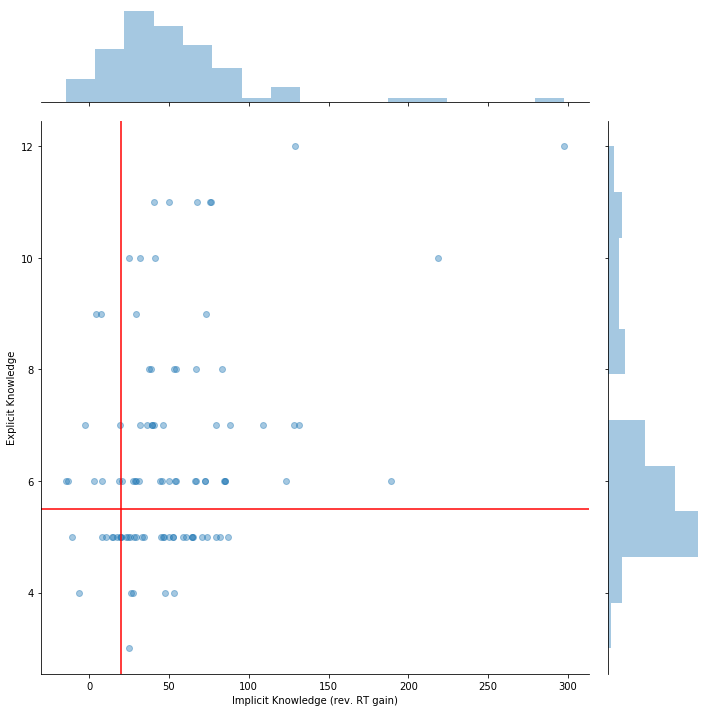

In [18]:

plot  = sns.jointplot(labels["Implicit Knowledge (rev. RT gain)"],
                      labels["Explicit Knowledge"],
                      kind='scatter',
                     alpha=0.4,
                      height=10,
                     )

plot.ax_joint.axvline(x=+20,c="red")
plot.ax_joint.axhline(y=5.5,c="red")

In [74]:
labels[["ImplizitesLernen_kont", "ExplizitesLernen_kont"]].describe(
            ).index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [76]:
descriptives = labels[["ImplizitesLernen_kont", "ExplizitesLernen_kont"]].describe(
            ).loc[["mean","std","50%","min","max"],:]

In [78]:
descriptives.to_clipboard()

In [80]:
descriptives.round(2)

ImplizitesLernen_kont  ExplizitesLernen_kont
mean                 -52.18                   6.47
std                   45.94                   1.98
50%                  -45.43                   6.00
min                 -297.58                   3.00
max                   14.54                  12.00